<a href="https://colab.research.google.com/github/Tomiwa29/tomiwa/blob/master/detecting%20suspicious%20transaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

Scenario:


Goal:
Detect suspicious transactions using Ml



# **Importing necessary liberies**

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.6 MB 21.3 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 75.3 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=352322 sha256=e965ce57e9931e83947008f46f57cbe4500fac0be9835dd4c424415a114a75eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-45rsxo8t/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

<ipython-input-2-172e324e16fd>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
# Reading the Dataset

df = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")

df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0

In [ ]:
df.tail()

step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
56198     9  CASH_OUT   16024.60  C1088493558      442118.00       426093.40   
56199     9   PAYMENT   20502.92   C410885495        3073.00            0.00   
56200     9   CASH_IN  175858.36   C702220078      290164.69       466023.05   
56201     9   PAYMENT    2955.89  C1632500548      466023.05       463067.17   
56202     9    PAYMEN        NaN          NaN            NaN             NaN   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
56198  C1084323592          5818.0         8074.67      0.0             0.0  
56199  M1731153077             0.0            0.00      0.0             0.0  
56200    C65594254         24083.0            0.00      0.0             0.0  
56201   M363811903             0.0            0.00      0.0             0.0  
56202          NaN             NaN             NaN      NaN             NaN

In [ ]:
df.describe()
# is a Pandas method that computes a summary of statistics for each column in a DataFrame. It returns a new DataFrame containing the following statistics:
#count: the number of non-null values in each column mean: the mean of each column std: the standard deviation of each column min: the minimum value in each column 50%: the 50th percentile (median) of each column 75%: the 75th percentile of each column max: the maximum value in each column
#This method can be useful for gaining a quick understanding of the distribution of values in each column of a DataFrame, and for detecting potential issues such as missing or outlier values.



step        amount  oldbalanceOrg  newbalanceOrig  \
count  56203.000000  5.620200e+04   5.620200e+04    5.620200e+04   
mean       7.624451  1.598924e+05   7.322726e+05    7.464767e+05   
std        1.999414  3.293750e+05   2.184696e+06    2.222611e+06   
min        1.000000  6.300000e-01   0.000000e+00    0.000000e+00   
25%        8.000000  8.135660e+03   0.000000e+00    0.000000e+00   
50%        8.000000  3.623700e+04   1.788471e+04    0.000000e+00   
75%        9.000000  1.918409e+05   1.401448e+05    1.534157e+05   
max        9.000000  1.000000e+07   2.854724e+07    2.861740e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    5.620200e+04    5.620200e+04  56202.000000         56202.0  
mean     8.391746e+05    1.169835e+06      0.001779             0.0  
std      2.407619e+06    2.893515e+06      0.042145             0.0  
min      0.000000e+00    0.000000e+00      0.000000             0.0  
25%      0.000000e+00    0.000000e+00      0.000000             0.0  
50%      5.114860e+03    2.167320e+03      0.000000             0.0  
75%      4.722510e+05    8.965790e+05      0.000000             0.0  
max      3.017978e+07    3.197699e+07      1.000000             0.0

In [ ]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

In [ ]:
df.shape

(56203, 11)

In [ ]:
df.isnull().sum()

step              0
type              0
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
df.isnull().values.any()

True

In [ ]:
list(df.loc[df.isFraud == 0].type.drop_duplicates().values) 

['PAYMENT', 'DEBIT', 'CASH_OUT', 'TRANSFER', 'CASH_IN']

In [ ]:
list(df.loc[df.isFraud == 1].type.drop_duplicates().values)

['TRANSFER', 'CASH_OUT']

In [ ]:
dft = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfc = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

In [ ]:
#Number of fraudulent TRANSFER
len(dft)

49

In [ ]:
#Number of fraudulent CASH_OUT
len(dfc)

51

In [ ]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 2:30].values
    y = df.Class.values
    return X, y

In [ ]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['nameOrig']=le.fit_transform(df['nameOrig'])
df['type']=le.fit_transform(df['type'])
df['nameDest']=le.fit_transform(df['nameDest'])

df.head(9)
# 3 is payment 4 is TRANSFER 1 is CASHOUT

step  type    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0     1     4   9839.64      6560      170136.00       160296.36     19803   
1     1     4   1864.28     19284       21249.00        19384.72     20581   
2     1     5    181.00      8684         181.00            0.00      5906   
3     1     1    181.00     51509         181.00            0.00      5249   
4     1     4  11668.14     30304       41554.00        29885.86     10417   
5     1     4   7817.71     53246       53860.00        46042.29     26463   
6     1     4   7107.77     15849      183195.00       176087.23     24386   
7     1     4   7861.64     26337      176087.23       168225.59     27232   
8     1     4   4024.36      7506        2671.00            0.00      9774   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0             0.0             0.0      0.0             0.0  
1             0.0             0.0      0.0             0.0  
2             0.0             0.0      1.0             0.0  
3         21182.0             0.0      1.0             0.0  
4             0.0             0.0      0.0             0.0  
5             0.0             0.0      0.0             0.0  
6             0.0             0.0      0.0             0.0  
7             0.0             0.0      0.0             0.0  
8             0.0             0.0      0.0             0.0

We check if their is a good proportion between our positive and negative binary predictor.

In [ ]:
df['isFraud'].value_counts()
#This means that there are 137993 rows where the value in the isFraud column is 0 and 122 rows where the value is 1.

0.0    56102
1.0      100
Name: isFraud, dtype: int64

# Create a histogram of transaction amounts
plt.hist(df['transaction_amount'], bins=50)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

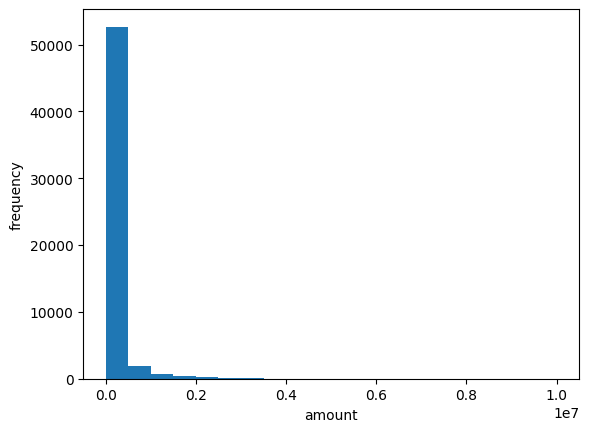

In [ ]:
# Create a histogram of transaction amounts
plt.hist(df['amount'], bins=20)
plt.xlabel('amount')
plt.ylabel('frequency')
plt.show()

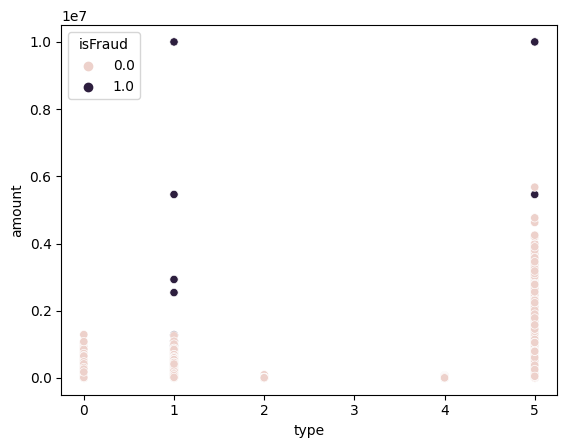

In [ ]:
# Create a scatterplot of transaction amounts by time
sns.scatterplot(x='type', y='amount', hue='isFraud', data=df)
plt.show()

### Correlation Matrix
Correlation Matrix lets you see correlations between all variable. How highly or weak each variable is related to each other.

In [ ]:
fraud_people = df[df['isFraud']==1]
legit_people = df[df['isFraud']==0]

In [ ]:
fraud_people.shape

(100, 11)

In [ ]:
legit_people.shape

(56102, 11)

In [ ]:
fraud_people['amount'].describe()

count    1.000000e+02
mean     5.739377e+05
std      1.644365e+06
min      1.640000e+02
25%      1.494984e+04
50%      3.192694e+04
75%      2.624345e+05
max      1.000000e+07
Name: amount, dtype: float64

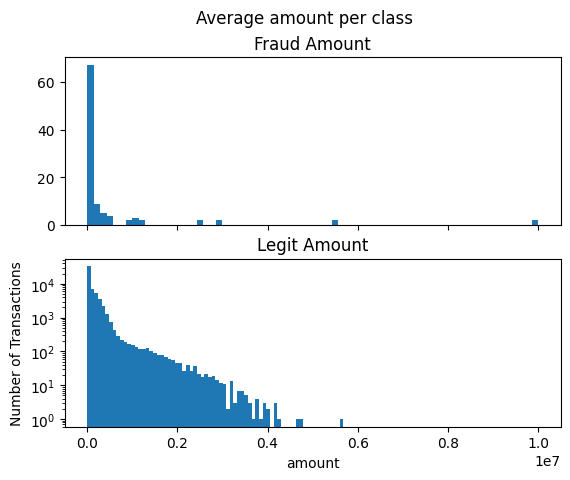

In [ ]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex = True)
graph.suptitle("Average amount per class")
bins = 70

plot1.hist(fraud_people['amount'], bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(legit_people['amount'], bins = bins)
plot2.set_title('Legit Amount')

plt.xlabel('amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

In [ ]:
columns = df.columns.tolist()
columns = [var for var in columns if var not in ["isFraud"]] #independent
target = "isFraud"
x = df[columns]
y = df[target] #dependent 

In [ ]:
x['type'].replace(['CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER'],['1','2','3','4','5',], inplace=True)

<ipython-input-27-9c04b7e9c924>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['type'].replace(['CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER'],['1','2','3','4','5',], inplace=True)


In [ ]:
x.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1, inplace=True)

<ipython-input-28-1829776b8fa9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1, inplace=True)


In [ ]:
y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: isFraud, dtype: float64

In [ ]:
x.head()

step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1     4   9839.64       170136.0       160296.36             0.0   
1     1     4   1864.28        21249.0        19384.72             0.0   
2     1     5    181.00          181.0            0.00             0.0   
3     1     1    181.00          181.0            0.00         21182.0   
4     1     4  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

By comparing positve and negative patients, we can see there are vast differences in means for many of our 13 features.

## Prepare Data for Modeling
To prepare data for modeling, remember ASN (Assign, Split, Normalize)

In [ ]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 2:30].values
    y = df.Class.values
    return X, y

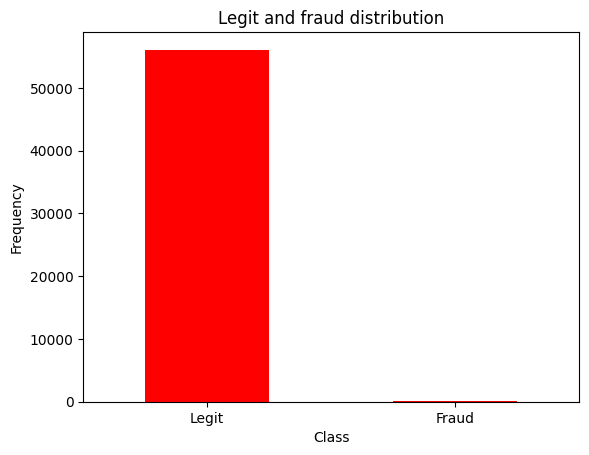

In [ ]:
fraud_check = pd.value_counts(df['isFraud'], sort =True)
fraud_check.plot(kind = 'bar', rot=0, color='r')
plt.title("Legit and fraud distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
Labels = ['Legit','Fraud']
plt.xticks(range(2), Labels)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 1)




In [ ]:
print(y_train.isnull().sum())

1


In [ ]:
y_train = y_train.dropna()

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(x_train)

# Transform the training and test data
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


In [ ]:
import numpy as np

# Find indices of samples with missing target values
missing_indices = np.isnan(y_test)

# Remove samples with missing target values
x_test = x_test[~missing_indices]
y_test = y_test[~missing_indices]


## Modeling / Training
Using various Supervised Learning Classification Models on the Training set and see which yields the highest accuracy.
Logistic Regression, K-NN (k-Nearest Neighbours), SVM (Support Vector Machine), Naives Bayes Classifier, Decision Trees, Random Forest, and XGBoost.

In [ ]:
from sklearn.model_selection import train_test_split

# Check data integrity and preprocessing steps

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Verify the shapes of the training and testing sets
print("Training set shapes:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("Testing set shapes:")
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

# Perform further data processing and model training
# ...
# Continue with your implementation


Training set shapes:
x_train: (44962, 7)
y_train: (44962,)
Testing set shapes:
x_test: (11241, 7)
y_test: (11241,)


In [ ]:
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]
x_test = x_test.dropna()
y_test = y_test.loc[x_test.index]


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, mean_squared_error, r2_score
model = RandomForestClassifier()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted)}')

# Calculate performance metrics
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
f1 = f1_score(y_test, predicted)
auc_roc = roc_auc_score(y_test, predicted)
mse = mean_squared_error(y_test,predicted)
r2 = r2_score(y_test, predicted)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print (f'auc_roc: {auc_roc}')
print (f'MSE: {mse}')
print (f'R2: {r2}')





Accuracy Score:
0.999377279601459
Accuracy: 0.999377279601459
Precision: 1.0
Recall: 0.5882352941176471
F1-Score: 0.7407407407407407
auc_roc: 0.7941176470588236
MSE: 0.0006227203985410551
R2: 0.5876116305396002


In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=2)

# Train the K-means model using the training data
kmeans.fit(x_train)

# Predict the clusters for the training and testing data
train_clusters = kmeans.predict(x_train)
test_clusters = kmeans.predict(x_test)

# Convert the cluster labels to binary labels
train_labels = train_clusters.copy()
train_labels[train_labels == 0] = 1
train_labels[train_labels == 1] = 0

test_labels = test_clusters.copy()
test_labels[test_labels == 0] = 1
test_labels[test_labels == 1] = 0

# Calculate the accuracy score
accuracy = accuracy_score(y_test, test_labels)
print(f'Accuracy Score: {accuracy}')

from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test, predicted)
print (f'auc_roc: {auc_roc}')

#confusion metrics
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predicted)
print (f'confusion metrics: {conf_matrix}')

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predicted)
print (f'MSE: {mse}')

from sklearn.metrics import r2_score
r2 = r2_score(y_test, predicted)
print (f'R2: {r2}')

from sklearn.metrics import precision_score
precision = precision_score(y_test, predicted)
print (f'Precision:{precision}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy Score: 0.9984876790321146
auc_roc: 0.7941176470588236
confusion metrics: [[11224     0]
 [    7    10]]
MSE: 0.0006227203985410551
R2: 0.5876116305396002
Precision:1.0


In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the ANN model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=32, activation='relu', input_dim=7))

# Add more hidden layers if needed
model.add(Dense(units=16, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Create the Sequential model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=32, activation='relu', input_dim=7))

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, mean_squared_error, r2_score
# Calculate performance metrics
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
f1 = f1_score(y_test, predicted)
auc_roc = roc_auc_score(y_test, predicted)
mse = mean_squared_error(y_test,predicted)
r2 = r2_score(y_test, predicted)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print (f'auc_roc: {auc_roc}')
print (f'MSE: {mse}')
print (f'R2: {r2}')



Epoch 1/10
1406/1406 [==============================] - 3s 2ms/step - loss: 736.5032 - accuracy: 0.9770
Epoch 2/10
1406/1406 [==============================] - 2s 2ms/step - loss: 62.6717 - accuracy: 0.9764
Epoch 3/10
1406/1406 [==============================] - 3s 2ms/step - loss: 83.2428 - accuracy: 0.9789
Epoch 4/10
1406/1406 [==============================] - 4s 3ms/step - loss: 31.1630 - accuracy: 0.9940
Epoch 5/10
1406/1406 [==============================] - 3s 2ms/step - loss: 25.9164 - accuracy: 0.9928
Epoch 6/10
1406/1406 [==============================] - 3s 2ms/step - loss: 31.9242 - accuracy: 0.9880
Epoch 7/10
1406/1406 [==============================] - 3s 2ms/step - loss: 26.7967 - accuracy: 0.9834
Epoch 8/10
1406/1406 [==============================] - 3s 2ms/step - loss: 16.4716 - accuracy: 0.9891
Epoch 9/10
1406/1406 [==============================] - 3s 2ms/step - loss: 24.3150 - accuracy: 0.9871
Epoch 10/10
352/352 [==============================] - 1s 1ms/step - los

PERFORMANCE METRICS

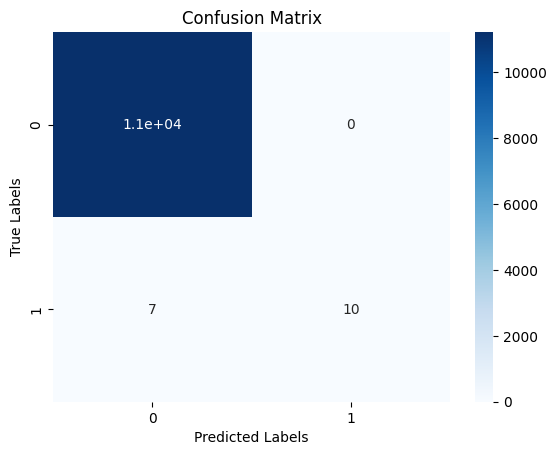

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


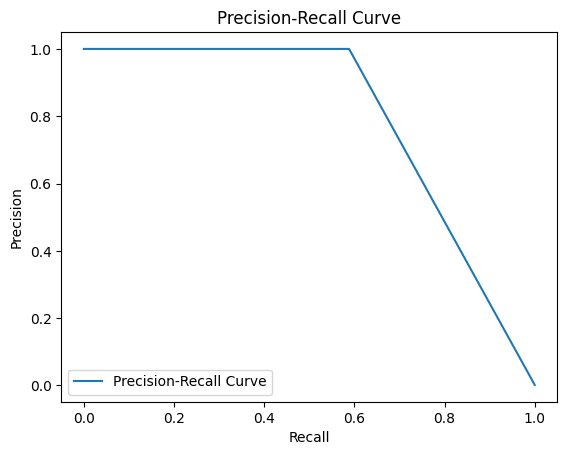

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming you have the true labels (y_true) and predicted probabilities (y_scores) for your model's predictions
#In a precision-recall curve, the x-axis represents recall (also known as sensitivity or true positive rate), and the y-axis represents precision

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, predicted)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


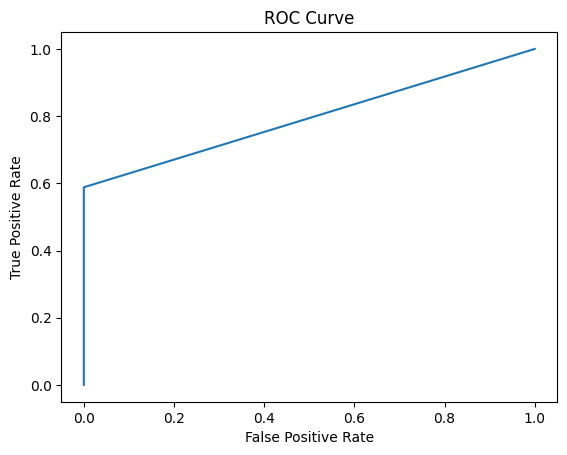

In [63]:
#ROC curve 
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, predicted)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


352/352 [==============================] - 1s 1ms/step


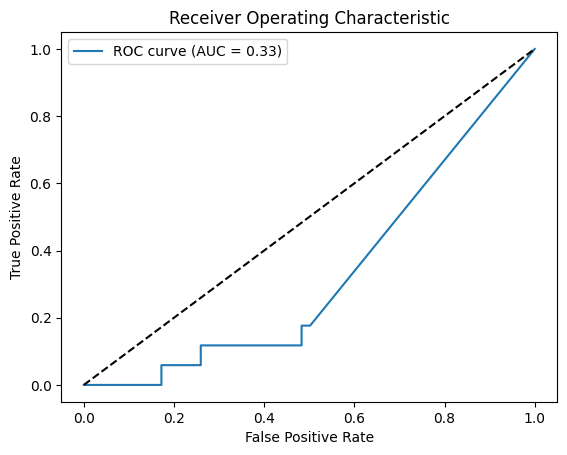

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the predicted probabilities
y_prob = model.predict(x_test)

# Extract the probabilities for the positive class
y_prob_positive = y_prob[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_prob_positive)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


In [101]:
from tensorflow import keras

# Define your ANN model
model2 = keras.Sequential()
model2.add(keras.layers.Dense(units=32, activation='relu', input_dim=7))
model2.add(keras.layers.Dense(units=16, activation='relu'))
model2.add(keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

# Define the individual classifiers
model1 = RandomForestClassifier()
model2 = MLPClassifier()  # Replace with your ANN model

# Create the Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('random_forest', model1), ('ann', model2)],
    voting='hard'
)

# Train the Voting Classifier
voting_classifier.fit(x_train, y_train)

# Make predictions using the Voting Classifier
predicted = voting_classifier.predict(x_test)

# Evaluate the accuracy of the Voting Classifier
accuracy = accuracy_score(y_test, predicted)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9991993594875901


In [105]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier

# Define the individual classifiers
kmeans = KMeans(n_clusters=2)
random_forest = RandomForestClassifier()
ann = MLPClassifier()  # Replace with your ANN model

# Create the Stacking Classifier
estimators = [
    ('kmeans', kmeans),
    ('random_forest', random_forest),
    ('ann', ann)
]

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=MLPClassifier()  # Replace with your final estimator
)

# Train the Stacking Classifier
stacking_classifier.fit(x_train, y_train)

# Make predictions using the Stacking Classifier
predicted = stacking_classifier.predict(x_test)

# Evaluate the accuracy of the Stacking Classifier
accuracy = accuracy_score(y_test, predicted)
print(f'Accuracy: {accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Accuracy: 0.9992883195445245
